In [1]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["exp2-baseline.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance
0,hpccstream,9,16,3,3,2022-03-15T18:29:12Z,2022-03-15T18:29:16Z,2022-03-15T18:30:48Z,2022-03-15T18:30:48Z,2m12.063624108s,7.840920
1,hpccfft,5,16,4,4,2022-03-15T18:30:12Z,2022-03-15T19:17:53Z,2022-03-15T19:21:18Z,2022-03-15T19:21:18Z,51m42.123674881s,1.230680
2,hpccfft,7,16,4,4,2022-03-15T18:30:12Z,2022-03-15T19:21:57Z,2022-03-15T19:25:22Z,2022-03-15T19:25:22Z,55m52.077318477s,1.260930
3,hpccptrans,5,16,3,3,2022-03-15T18:31:12Z,2022-03-15T19:26:06Z,2022-03-15T19:30:52Z,2022-03-15T19:30:52Z,1h0m22.148169274s,0.312577
4,hpccptrans,1,16,3,3,2022-03-15T18:31:12Z,2022-03-15T18:31:28Z,2022-03-15T18:36:31Z,2022-03-15T18:36:31Z,6m2.063032253s,0.255566
...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-15T18:38:21Z,2022-03-15T20:38:46Z,2022-03-15T20:42:19Z,2022-03-15T20:42:19Z,2h4m33.124359378s,1.123810
66,hpccptrans,9,16,4,4,2022-03-15T18:40:21Z,2022-03-15T20:52:36Z,2022-03-15T20:57:19Z,2022-03-15T20:57:19Z,2h17m33.125572714s,0.295063
67,hpccfft,9,16,3,3,2022-03-15T18:41:21Z,2022-03-15T20:48:21Z,2022-03-15T20:51:54Z,2022-03-15T20:51:54Z,2h11m13.125318643s,1.126180
68,hpccrandomaccess,0,16,4,4,2022-03-15T18:43:21Z,2022-03-15T20:57:58Z,2022-03-15T21:00:37Z,2022-03-15T21:00:37Z,2h17m53.122201381s,0.025477


In [2]:
print (df.dtypes)

benchmark       object
times            int64
nTasks           int64
nNodes           int64
nWorkers         int64
Pending         object
Running         object
Completing      object
Completed       object
duration        object
performance    float64
dtype: object


In [3]:
from datetime import datetime
df['Pending'] = pd.to_datetime(df['Pending'], format='%Y-%m-%d')
df['Running'] = pd.to_datetime(df['Running'], format='%Y-%m-%d')
df['Completing'] = pd.to_datetime(df['Completing'], format='%Y-%m-%d')
df['Completed'] = pd.to_datetime(df['Completed'], format='%Y-%m-%d')
df['duration'] = pd.to_timedelta(df['duration'])

In [4]:
df['init'] = df['Running'] - df['Pending']
df['run'] = df['Completing'] - df['Running']
df['final'] = df['Completed'] - df['Completing']
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final
0,hpccstream,9,16,3,3,2022-03-15 18:29:12+00:00,2022-03-15 18:29:16+00:00,2022-03-15 18:30:48+00:00,2022-03-15 18:30:48+00:00,0 days 00:02:12.063624108,7.840920,0 days 00:00:04,0 days 00:01:32,0 days
1,hpccfft,5,16,4,4,2022-03-15 18:30:12+00:00,2022-03-15 19:17:53+00:00,2022-03-15 19:21:18+00:00,2022-03-15 19:21:18+00:00,0 days 00:51:42.123674881,1.230680,0 days 00:47:41,0 days 00:03:25,0 days
2,hpccfft,7,16,4,4,2022-03-15 18:30:12+00:00,2022-03-15 19:21:57+00:00,2022-03-15 19:25:22+00:00,2022-03-15 19:25:22+00:00,0 days 00:55:52.077318477,1.260930,0 days 00:51:45,0 days 00:03:25,0 days
3,hpccptrans,5,16,3,3,2022-03-15 18:31:12+00:00,2022-03-15 19:26:06+00:00,2022-03-15 19:30:52+00:00,2022-03-15 19:30:52+00:00,0 days 01:00:22.148169274,0.312577,0 days 00:54:54,0 days 00:04:46,0 days
4,hpccptrans,1,16,3,3,2022-03-15 18:31:12+00:00,2022-03-15 18:31:28+00:00,2022-03-15 18:36:31+00:00,2022-03-15 18:36:31+00:00,0 days 00:06:02.063032253,0.255566,0 days 00:00:16,0 days 00:05:03,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-15 18:38:21+00:00,2022-03-15 20:38:46+00:00,2022-03-15 20:42:19+00:00,2022-03-15 20:42:19+00:00,0 days 02:04:33.124359378,1.123810,0 days 02:00:25,0 days 00:03:33,0 days
66,hpccptrans,9,16,4,4,2022-03-15 18:40:21+00:00,2022-03-15 20:52:36+00:00,2022-03-15 20:57:19+00:00,2022-03-15 20:57:19+00:00,0 days 02:17:33.125572714,0.295063,0 days 02:12:15,0 days 00:04:43,0 days
67,hpccfft,9,16,3,3,2022-03-15 18:41:21+00:00,2022-03-15 20:48:21+00:00,2022-03-15 20:51:54+00:00,2022-03-15 20:51:54+00:00,0 days 02:11:13.125318643,1.126180,0 days 02:07:00,0 days 00:03:33,0 days
68,hpccrandomaccess,0,16,4,4,2022-03-15 18:43:21+00:00,2022-03-15 20:57:58+00:00,2022-03-15 21:00:37+00:00,2022-03-15 21:00:37+00:00,0 days 02:17:53.122201381,0.025477,0 days 02:14:37,0 days 00:02:39,0 days


In [5]:
df['start'] = df['Pending'][0]
df['afterstart'] = df['Pending'] - df['start']

In [6]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccstream,9,16,3,3,2022-03-15 18:29:12+00:00,2022-03-15 18:29:16+00:00,2022-03-15 18:30:48+00:00,2022-03-15 18:30:48+00:00,0 days 00:02:12.063624108,7.840920,0 days 00:00:04,0 days 00:01:32,0 days,2022-03-15 18:29:12+00:00,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-15 18:30:12+00:00,2022-03-15 19:17:53+00:00,2022-03-15 19:21:18+00:00,2022-03-15 19:21:18+00:00,0 days 00:51:42.123674881,1.230680,0 days 00:47:41,0 days 00:03:25,0 days,2022-03-15 18:29:12+00:00,0 days 00:01:00
2,hpccfft,7,16,4,4,2022-03-15 18:30:12+00:00,2022-03-15 19:21:57+00:00,2022-03-15 19:25:22+00:00,2022-03-15 19:25:22+00:00,0 days 00:55:52.077318477,1.260930,0 days 00:51:45,0 days 00:03:25,0 days,2022-03-15 18:29:12+00:00,0 days 00:01:00
3,hpccptrans,5,16,3,3,2022-03-15 18:31:12+00:00,2022-03-15 19:26:06+00:00,2022-03-15 19:30:52+00:00,2022-03-15 19:30:52+00:00,0 days 01:00:22.148169274,0.312577,0 days 00:54:54,0 days 00:04:46,0 days,2022-03-15 18:29:12+00:00,0 days 00:02:00
4,hpccptrans,1,16,3,3,2022-03-15 18:31:12+00:00,2022-03-15 18:31:28+00:00,2022-03-15 18:36:31+00:00,2022-03-15 18:36:31+00:00,0 days 00:06:02.063032253,0.255566,0 days 00:00:16,0 days 00:05:03,0 days,2022-03-15 18:29:12+00:00,0 days 00:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-15 18:38:21+00:00,2022-03-15 20:38:46+00:00,2022-03-15 20:42:19+00:00,2022-03-15 20:42:19+00:00,0 days 02:04:33.124359378,1.123810,0 days 02:00:25,0 days 00:03:33,0 days,2022-03-15 18:29:12+00:00,0 days 00:09:09
66,hpccptrans,9,16,4,4,2022-03-15 18:40:21+00:00,2022-03-15 20:52:36+00:00,2022-03-15 20:57:19+00:00,2022-03-15 20:57:19+00:00,0 days 02:17:33.125572714,0.295063,0 days 02:12:15,0 days 00:04:43,0 days,2022-03-15 18:29:12+00:00,0 days 00:11:09
67,hpccfft,9,16,3,3,2022-03-15 18:41:21+00:00,2022-03-15 20:48:21+00:00,2022-03-15 20:51:54+00:00,2022-03-15 20:51:54+00:00,0 days 02:11:13.125318643,1.126180,0 days 02:07:00,0 days 00:03:33,0 days,2022-03-15 18:29:12+00:00,0 days 00:12:09
68,hpccrandomaccess,0,16,4,4,2022-03-15 18:43:21+00:00,2022-03-15 20:57:58+00:00,2022-03-15 21:00:37+00:00,2022-03-15 21:00:37+00:00,0 days 02:17:53.122201381,0.025477,0 days 02:14:37,0 days 00:02:39,0 days,2022-03-15 18:29:12+00:00,0 days 00:14:09


In [7]:
df['benchmark'].unique()

array(['hpccstream', 'hpccfft', 'hpccptrans', 'hpccrandomringbw',
       'hpccrandomringlat', 'hpccdgemm', 'hpccrandomaccess'], dtype=object)

In [8]:
df['nWorkers'].unique()

array([3, 4, 1, 2])

#  performance

In [9]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_performance = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_mean' : mean(x['performance']),
                  'model_time_std' : std(x['performance']),
              })).reset_index()
            df_performance.append(df_senario)

In [10]:
df_performance = pd.concat(df_performance, axis=0)
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std
0,hpccstream,16,3,3,7.738665,0.145459
0,hpccstream,16,2,2,7.310460,0.417241
0,hpccstream,16,1,1,4.924970,0.350488
0,hpccfft,16,4,4,1.240173,0.014695
0,hpccfft,16,1,1,12.648233,1.847076
0,hpccfft,16,2,2,0.974059,0.034371
0,hpccfft,16,3,3,1.124995,0.001185
0,hpccptrans,16,3,3,0.281697,0.023889
0,hpccptrans,16,1,1,8.428755,0.608815
0,hpccptrans,16,2,2,0.287666,0.017509


    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccstream      16       3         3         7.738665        0.145459
0  hpccstream      16       2         2         7.310460        0.417241
0  hpccstream      16       1         1         4.924970        0.350488
  benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0   hpccfft      16       4         4         1.240173        0.014695
0   hpccfft      16       1         1        12.648233        1.847076
0   hpccfft      16       2         2         0.974059        0.034371
0   hpccfft      16       3         3         1.124995        0.001185
    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccptrans      16       3         3         0.281697        0.023889
0  hpccptrans      16       1         1         8.428755        0.608815
0  hpccptrans      16       2         2         0.287666        0.017509
0  hpccptrans      16       4         4         0.295063     

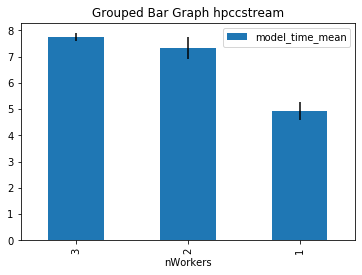

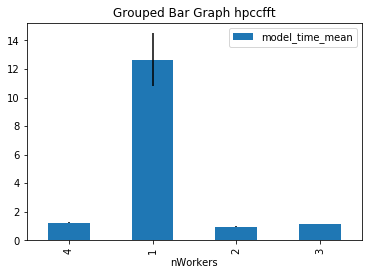

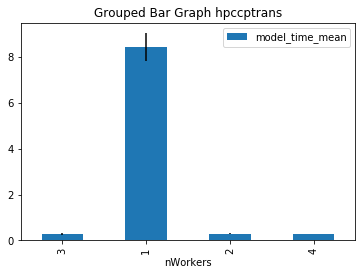

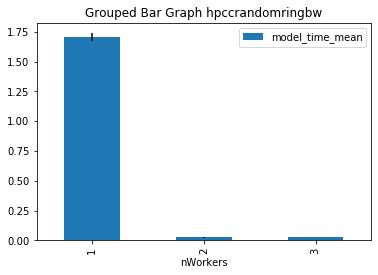

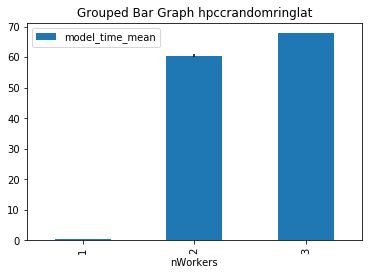

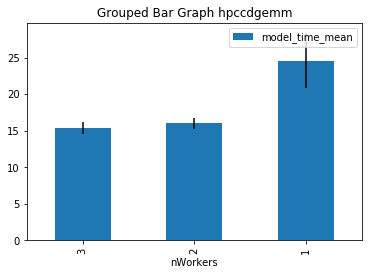

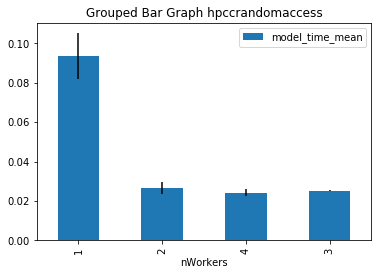

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

#  time slot

In [12]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_mean' : mean(x['init']),
                  'init_std' : std(x['init']),
                'run_mean' : mean(x['run']),
                  'run_std' : std(x['run']),
                'final_mean' : mean(x['final']),
                  'final_std' : std(x['final']),
                'duration_mean' : mean(x['duration']),
                  'duration_std' : std(x['duration']),
              })).reset_index()
            df_time.append(df_senario)

In [13]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std
0,hpccstream,16,3,3,0 days 01:09:34.250000,0 days 00:43:04.280884017,0 days 00:01:32.750000,0 days 00:00:01.920286436,0 days 00:00:00,0 days 00:00:00,0 days 01:11:46.602985057,0 days 00:43:05.112178291
0,hpccstream,16,2,2,0 days 00:21:19.666666666,0 days 00:08:52.389790368,0 days 00:01:27.333333333,0 days 00:00:02.624669291,0 days 00:00:01,0 days 00:00:00.816496580,0 days 00:23:24.153590115,0 days 00:08:51.775981786
0,hpccstream,16,1,1,0 days 00:13:50,0 days 00:00:32.526911934,0 days 00:01:32.333333333,0 days 00:00:03.299831645,0 days 00:00:00,0 days 00:00:00,0 days 00:15:57.412157366,0 days 00:00:31.824533640
0,hpccfft,16,4,4,0 days 01:02:42,0 days 00:18:26.166654110,0 days 00:03:26.333333333,0 days 00:00:01.885618083,0 days 00:00:00,0 days 00:00:00,0 days 01:06:47.108391945,0 days 00:18:27.807491104
0,hpccfft,16,1,1,0 days 00:08:15,0 days 00:02:53.083794735,0 days 00:01:23,0 days 00:00:01.414213562,0 days 00:00:00.333333333,0 days 00:00:00.471404520,0 days 00:10:14.977099367,0 days 00:02:47.512501301
0,hpccfft,16,2,2,0 days 00:29:08,0 days 00:05:17,0 days 00:03:54,0 days 00:00:05,0 days 00:00:00,0 days 00:00:00,0 days 00:33:41.602021387,0 days 00:05:12.476231857
0,hpccfft,16,3,3,0 days 02:03:42.500000,0 days 00:03:17.500000,0 days 00:03:33,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 02:07:53.124839010,0 days 00:03:20.000479632
0,hpccptrans,16,3,3,0 days 00:56:30.500000,0 days 00:35:35.697251484,0 days 00:04:55.750000,0 days 00:00:06.299801584,0 days 00:00:00.250000,0 days 00:00:00.433012701,0 days 01:02:08.104020675,0 days 00:35:32.820140258
0,hpccptrans,16,1,1,0 days 00:11:56,0 days 00:00:12,0 days 00:01:37,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:14:16.102698262,0 days 00:00:10.039492601
0,hpccptrans,16,2,2,0 days 00:26:54.666666666,0 days 00:01:22.208407247,0 days 00:04:48.666666666,0 days 00:00:31.457201966,0 days 00:00:00,0 days 00:00:00,0 days 00:32:20.128050004,0 days 00:01:03.820913920


<ipython-input-14-dbdb2ccec5d7>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-dbdb2ccec5d7>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



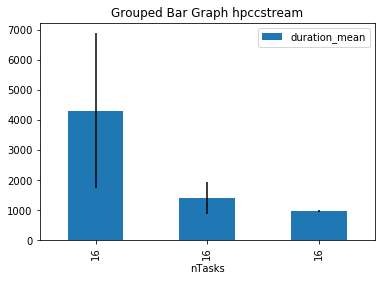

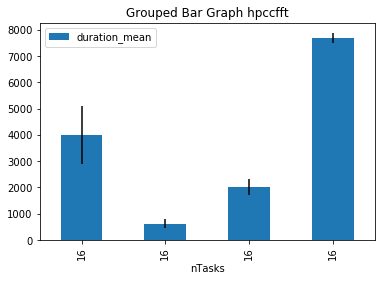

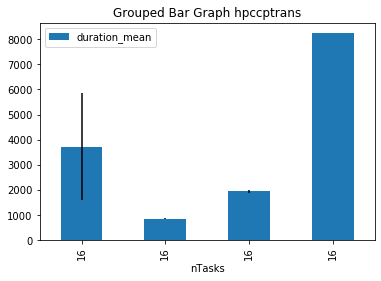

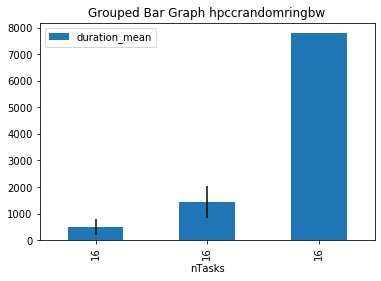

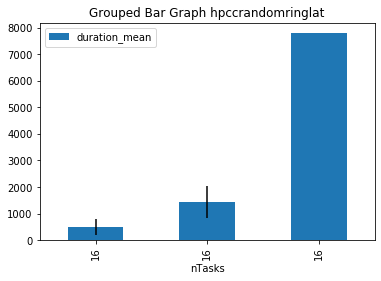

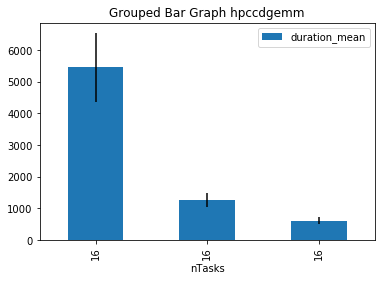

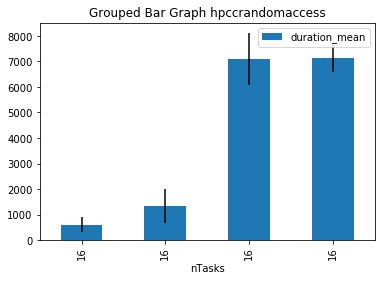

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_mean'] = df_bench['duration_mean'].dt.total_seconds()
    df_bench['duration_std'] = df_bench['duration_std'].dt.total_seconds()

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_mean',
                  yerr='duration_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

In [15]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nTasks in df_bench.nTasks.unique():
            df_senario = df_bench[df_bench.nTasks == nTasks]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_sum' : sum(x['init'].dt.total_seconds()),
                'run_sum' : sum(x['run'].dt.total_seconds()),
                'final_sum' : sum(x['final'].dt.total_seconds()),
                'duration_sum' : sum(x['duration'].dt.total_seconds()),
              })).reset_index()
            df_time.append(df_senario)

In [16]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum
0,hpccstream,16,23026.0,910.0,3.0,24311.109183
0,hpccfft,16,31112.0,1762.0,1.0,33255.710195
0,hpccptrans,16,27773.0,2526.0,1.0,30698.131202
0,hpccrandomringbw,16,13826.0,799.0,2.0,14980.734464
0,hpccrandomringlat,16,13826.0,799.0,2.0,14980.734464
0,hpccdgemm,16,28072.0,3188.0,1.0,31632.451805
0,hpccrandomaccess,16,38880.0,1493.0,0.0,40756.952345


<ipython-input-17-1521fc477d73>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



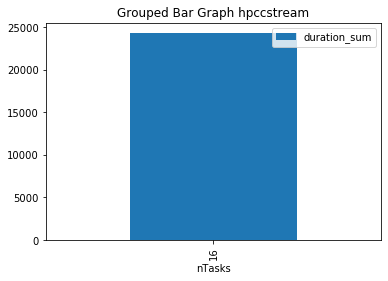

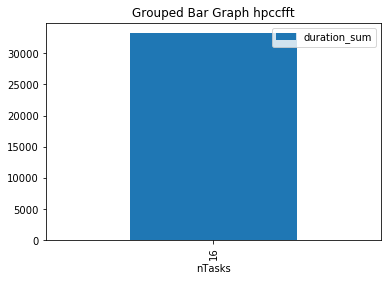

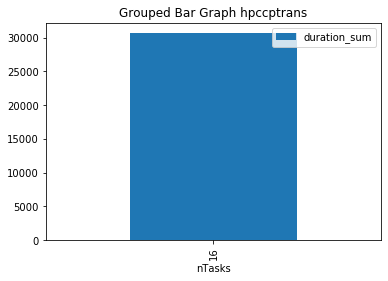

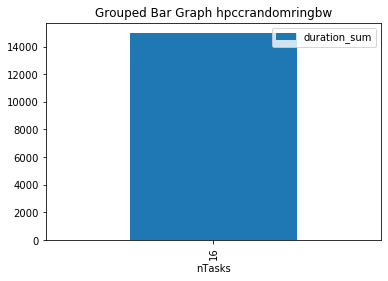

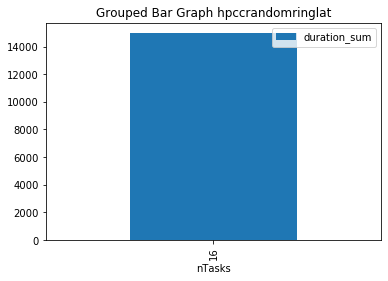

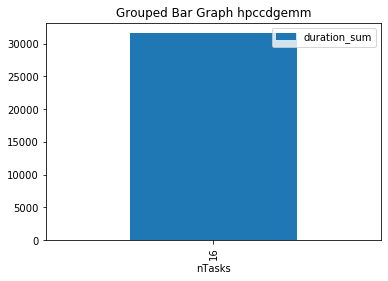

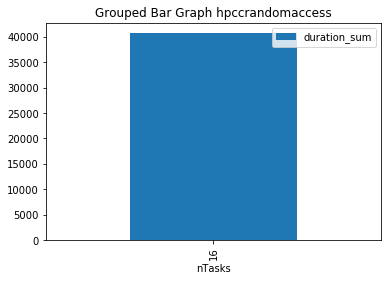

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_sum'] = df_bench['duration_sum']

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_sum',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

# Graph

In [18]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccstream,9,16,3,3,2022-03-15 18:29:12+00:00,2022-03-15 18:29:16+00:00,2022-03-15 18:30:48+00:00,2022-03-15 18:30:48+00:00,0 days 00:02:12.063624108,7.840920,0 days 00:00:04,0 days 00:01:32,0 days,2022-03-15 18:29:12+00:00,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-15 18:30:12+00:00,2022-03-15 19:17:53+00:00,2022-03-15 19:21:18+00:00,2022-03-15 19:21:18+00:00,0 days 00:51:42.123674881,1.230680,0 days 00:47:41,0 days 00:03:25,0 days,2022-03-15 18:29:12+00:00,0 days 00:01:00
2,hpccfft,7,16,4,4,2022-03-15 18:30:12+00:00,2022-03-15 19:21:57+00:00,2022-03-15 19:25:22+00:00,2022-03-15 19:25:22+00:00,0 days 00:55:52.077318477,1.260930,0 days 00:51:45,0 days 00:03:25,0 days,2022-03-15 18:29:12+00:00,0 days 00:01:00
3,hpccptrans,5,16,3,3,2022-03-15 18:31:12+00:00,2022-03-15 19:26:06+00:00,2022-03-15 19:30:52+00:00,2022-03-15 19:30:52+00:00,0 days 01:00:22.148169274,0.312577,0 days 00:54:54,0 days 00:04:46,0 days,2022-03-15 18:29:12+00:00,0 days 00:02:00
4,hpccptrans,1,16,3,3,2022-03-15 18:31:12+00:00,2022-03-15 18:31:28+00:00,2022-03-15 18:36:31+00:00,2022-03-15 18:36:31+00:00,0 days 00:06:02.063032253,0.255566,0 days 00:00:16,0 days 00:05:03,0 days,2022-03-15 18:29:12+00:00,0 days 00:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-15 18:38:21+00:00,2022-03-15 20:38:46+00:00,2022-03-15 20:42:19+00:00,2022-03-15 20:42:19+00:00,0 days 02:04:33.124359378,1.123810,0 days 02:00:25,0 days 00:03:33,0 days,2022-03-15 18:29:12+00:00,0 days 00:09:09
66,hpccptrans,9,16,4,4,2022-03-15 18:40:21+00:00,2022-03-15 20:52:36+00:00,2022-03-15 20:57:19+00:00,2022-03-15 20:57:19+00:00,0 days 02:17:33.125572714,0.295063,0 days 02:12:15,0 days 00:04:43,0 days,2022-03-15 18:29:12+00:00,0 days 00:11:09
67,hpccfft,9,16,3,3,2022-03-15 18:41:21+00:00,2022-03-15 20:48:21+00:00,2022-03-15 20:51:54+00:00,2022-03-15 20:51:54+00:00,0 days 02:11:13.125318643,1.126180,0 days 02:07:00,0 days 00:03:33,0 days,2022-03-15 18:29:12+00:00,0 days 00:12:09
68,hpccrandomaccess,0,16,4,4,2022-03-15 18:43:21+00:00,2022-03-15 20:57:58+00:00,2022-03-15 21:00:37+00:00,2022-03-15 21:00:37+00:00,0 days 02:17:53.122201381,0.025477,0 days 02:14:37,0 days 00:02:39,0 days,2022-03-15 18:29:12+00:00,0 days 00:14:09


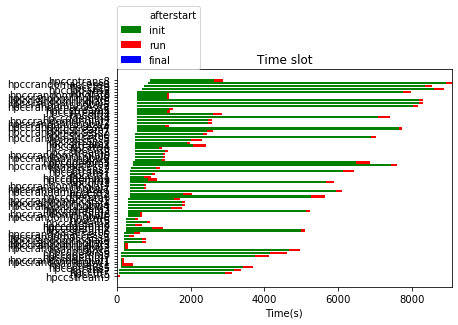

In [19]:
import numpy as np
import matplotlib.pyplot as plt

color=['white','green','red','blue']

y1 = df['afterstart'].dt.total_seconds()
y2 = df['init'].dt.total_seconds()
y3 = df['run'].dt.total_seconds()
y4 = df['final'].dt.total_seconds()

labels = df['benchmark']+df['times'].map(str)

plt.barh(labels, y1, color='white', label='afterstart')
plt.barh(labels, y2, left=y1, color='green', label='init')
plt.barh(labels, y3, left=y1+y2, color='red', label='run')
plt.barh(labels, y4, left=y1+y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0, 1])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()
